In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train = x_train / 255
x_test = x_test / 255

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

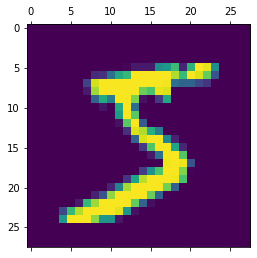

In [9]:
plt.matshow(x_train[0])

In [10]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [13]:
x_test_flattened=x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [14]:
model = keras.Sequential([   
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')                 
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 464us/step - loss: 0.4663 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 1s 455us/step - loss: 0.3037 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 1s 464us/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 1s 462us/step - loss: 0.2736 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 1s 468us/step - loss: 0.2668 - accuracy: 0.9260


In [15]:
model.evaluate(x_train_flattened, y_train)

1875/1875 [==============================] - 1s 357us/step - loss: 0.2613 - accuracy: 0.9277


[0.2612680494785309, 0.9276999831199646]

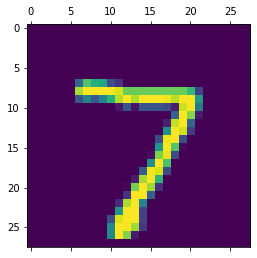

In [16]:
plt.matshow(x_test[0])

In [17]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

array([2.7213246e-02, 5.2360303e-07, 5.4881245e-02, 9.4235122e-01,
       3.7771165e-03, 1.4759502e-01, 1.3676045e-06, 9.9982971e-01,
       1.2250921e-01, 6.4570588e-01], dtype=float32)

In [18]:
np.argmax(y_predicted[0])

7

In [21]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
cm=tf.math.confusion_matrix(y_test,y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    1,    0,    5,    6,    3,    4,    0],
       [   0, 1112,    3,    2,    1,    1,    4,    2,   10,    0],
       [   6,   11,  905,   18,   10,    5,   13,   13,   49,    2],
       [   2,    0,   18,  906,    1,   38,    1,   13,   26,    5],
       [   2,    1,    3,    1,  935,    0,    8,    4,   10,   18],
       [   7,    3,    2,   18,   13,  794,   13,    5,   33,    4],
       [   9,    3,    8,    1,    8,   15,  909,    2,    3,    0],
       [   1,    5,   21,    5,    9,    0,    0,  962,    4,   21],
       [   5,    9,    5,   15,    9,   26,    8,   13,  881,    3],
       [  10,    7,    1,    8,   57,    8,    0,   32,   12,  874]])>

Text(69.0, 0.5, 'Truth')

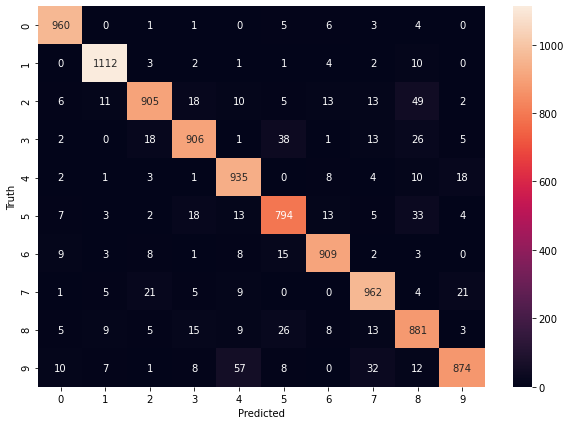

In [24]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
model = keras.Sequential([   
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),  
    keras.layers.Dense(10, activation='sigmoid')                     
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 578us/step - loss: 0.2738 - accuracy: 0.92210s - loss: 0.345
Epoch 2/5
1875/1875 [==============================] - 1s 553us/step - loss: 0.1234 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 1s 531us/step - loss: 0.0857 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 1s 527us/step - loss: 0.0656 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 1s 532us/step - loss: 0.0506 - accuracy: 0.9841


In [27]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 513us/step - loss: 0.0770 - accuracy: 0.9763


[0.07697401195764542, 0.9763000011444092]

Text(69.0, 0.5, 'Truth')

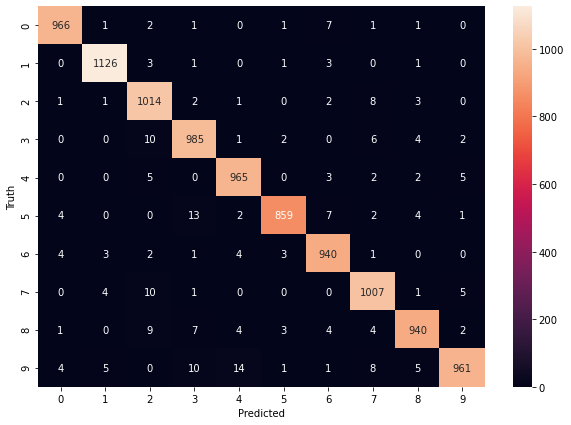

In [30]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(y_test,y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',    #It fetches the data from online server, process the data and return the data as training and test set.
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 541us/step - loss: 0.2781 - accuracy: 0.92180s - loss: 0
Epoch 2/10
1875/1875 [==============================] - 1s 541us/step - loss: 0.1266 - accuracy: 0.9627
Epoch 3/10
1875/1875 [==============================] - 1s 609us/step - loss: 0.0872 - accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 1s 580us/step - loss: 0.0661 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 1s 613us/step - loss: 0.0529 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 1s 572us/step - loss: 0.0419 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 1s 560us/step - loss: 0.0352 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 1s 675us/step - loss: 0.0280 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 1s 552us/step - loss: 0.0233 - accuracy: 0.9927
Epoch 10/10
1875/1875 [=============================